<a href="https://colab.research.google.com/github/ahmadmirza17/student-linear-regression-analysis/blob/main/student_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pickle 
from matplotlib import style 

In [30]:
from google.colab import files
uploaded = files.upload() 
import io 

df = pd.read_csv(io.StringIO(uploaded['student-mat.csv'].decode('utf-8')), sep=';')

Saving student-mat.csv to student-mat (3).csv


In [31]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [32]:
df = df[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']]
df

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4
...,...,...,...,...,...,...
390,9,9,9,2,2,11
391,14,16,16,1,0,3
392,10,8,7,1,3,3
393,11,12,10,1,0,0


In [33]:
df.index

RangeIndex(start=0, stop=395, step=1)

In [34]:
predict = 'G3'
X = np.array(df.drop([predict], 1))
Y = np.array(df[predict])
x_train , x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.1)
# To save the most accurate model
'''
best = 0
for _ in range(30):
  x_train , x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.1)

  linear = linear_model.LinearRegression()

  linear.fit(x_train, y_train)
  acc = linear.score(x_test, y_test)
  print(acc)

  if acc > best:
    best = acc 
    with open('studentmodel.pickle', 'wb') as f:
      pickle.dump(linear, f)'''
  

0.8605006492399699
0.7833724774019961
0.8321274922296098
0.7856177521651109
0.8057662997883817
0.9092533623636693
0.8383108706850277
0.7365186835061424
0.8546245070873102
0.8360209013775357
0.780259291227819
0.8087532754146016
0.7663919743748555
0.777727168478593
0.8142278523673527
0.8310135853297997
0.8632476216078109
0.8386043902805422
0.7488712981899555
0.8818987743228972
0.8275038746590003
0.8347247671100515
0.860094428585541
0.7690233066006055
0.833056997163579
0.8303070421726166
0.8541081060316369
0.8588999219797409
0.8348993494245296
0.8604906423105005


In [35]:
pickle_in = open('studentmodel.pickle', 'rb')
linear = pickle.load(pickle_in)

In [36]:
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Coefficient: 
 [ 0.15393493  0.97100787 -0.22126256 -0.29240598  0.03708388]
Intercept: 
 -1.3364113324648699


In [37]:
predictions = linear.predict(x_test)

for x in range(len(predictions)): 
  print(predictions[x], x_test[x], y_test[x])


8.499483689862572 [10  9  2  0  0] 9
13.700717478944405 [12 14  3  0  7] 14
5.064510277568638 [6 7 2 3 0] 0
5.039288685165957 [5 6 2 0 6] 6
10.823537046714986 [12 11  2  0  2] 12
3.4860439433366075 [6 5 3 1 0] 0
8.42655663873596 [10  9  3  0  4] 9
10.140469689111518 [ 9 11  3  0  2] 11
7.294773710811665 [8 8 2 0 2] 8
13.743400779569107 [13 14  3  0  4] 14
15.243541073409432 [15 15  2  0  4] 15
12.317428240283046 [11 13  4  0  6] 14
7.220605956257396 [8 8 2 0 0] 9
16.435811502337554 [15 16  1  0  4] 15
11.79454491540795 [12 12  2  0  2] 11
9.250469701748042 [10 10  4  0  6] 11
11.314935917660511 [12 12  4  0  1] 12
5.495494059186707 [ 7  6  2  0 10] 6
7.073511150576513 [8 8 3 0 2] 10
12.624057401767601 [13 13  3  0  0] 13
13.466458681092263 [15 14  3  2  4] 15
12.011448755723196 [11 12  2  0 12] 11
9.53221976298702 [ 8 10  1  0  4] 10
3.639978875792713 [7 5 3 1 0] 0
11.04044088703023 [11 11  2  0 12] 11
18.537361595527155 [17 18  1  0  0] 18
13.066582522237905 [13 13  1  0  0] 12
6.3979

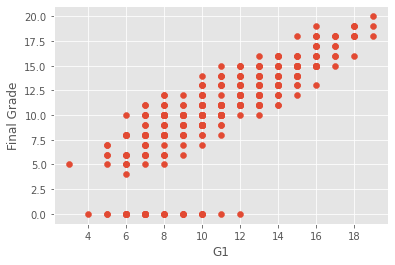

In [39]:
style.use('ggplot')
# p can be modified to account for other attributes such as G2, absences, failures etc
p = 'G1'
plt.scatter(df[p], df['G3'])
plt.xlabel(p)
plt.ylabel('Final Grade')
plt.show()